In [2]:
# imports 
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from time import perf_counter

# Exercise 1

In [ ]:
# Exercise 1
# Given a (h, w, 3) image convolved with a K x K filter,
# compute the number of flops needed to compute the convolution operation (excluding flops needed for the incrementation of indices)
def compute_conv_flops(h, w, K):
    return (h) * (w) * K * K * 3

# maybe if we consider  + and * as two different op , we can say that the number of flops is
# (h) * (w) * K * K * 3 * 2


# Exercise 2
* FMA =  Fused Multiply-Add : performs both multiplication and addition in a single operation. 
* DSP (Digital Signal Processing);
* FMA typically implemented using : AVX (Advanced Vector Extensions) -> can provide even greater performance improvements for vectorized computations.

1. Provide your CPU model and check its support for FMA operations.
* Yes, the CPU support FMA operations. My CPU model: Intel Core i5-9300H



2. Does your CPU implement AVX?
* After running a simple software (HWiNFO64) it seems that my CPU implements AVX. (also AVX2) 

3. What would be the expected speed-up with a 4xFMA ALU option, compared to the answer of the previous question?



* 4xFMA = perform 4 FMA operations simultaneously (4x speed) in a single clock cycle. I think that the performance improvement depend on the specific task being processed. But, in general, the speed-up could be significant, especially on task that involve large matrices or arrays.

(Note) : an image is provided with the specific application that describes the CPU performances.


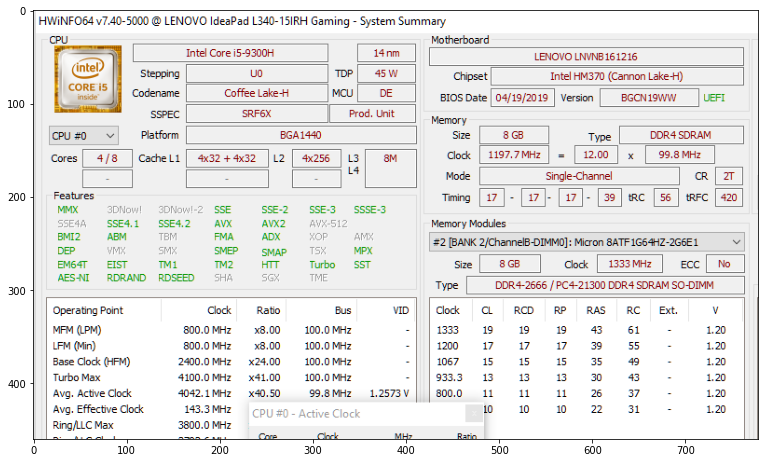

In [3]:
processor = cv.imread('./imgs/procesor.png')
# set figure size
plt.figure(figsize=(13, 13))
plt.imshow(processor)
plt.show()

# Exercise 3

In [18]:
# implement median filter with different sort algorithms
def sort1_function(nums):
    # nums: list of numbers
    # return: sorted list of numbers
    return sorted(nums)


def median_filter(img, K):
    t1_start = perf_counter()
    # img: (h, w, 3)
    # K: size of the filter
    # return: (h, w, 3)
    h, w, _ = img.shape
    pad = K // 2
    img_pad = np.pad(img, ((pad, pad), (pad, pad), (0, 0)), 'constant')
    img_out = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            for k in range(3):
                img_out[i, j, k] = np.median(img_pad[i:i+K, j:j+K, k])
    t1_stop = perf_counter() 
    print("Elapsed time during the whole program in seconds:", t1_stop-t1_start)
    return img_out

# load image
kernel_size = 5
img = cv.imread('imgs/image.jpg')
result_img = median_filter(img, kernel_size)
# save image with cv2
cv.imwrite('imgs/image_median_filter' + str(kernel_size) + '.jpg', result_img)


Elapsed time during the whole program in seconds: 2.924612299999353


True

Redo the exercise : reuse some code that was provided in the lab:


In [6]:

def generic_convolution(input_image, correlation_filter, agg_function):
  h, w = input_image.shape
  h_c, w_c = correlation_filter.shape

  d_h = h_c // 2
  d_w = w_c // 2

  # padding is needed such that in your iterative procedure you don't have negative indices or indices 
  # outside the image
  oper_image = np.zeros((h + 2 * d_h, w + 2 * d_w))
  # insert the input image in the center of the padded image, such that you will
  # have a 0-border with a height h_c // 2 and a width w_c // 2
  oper_image[d_h:(h + d_h), d_w:(w + d_w)] = input_image
  output_img = np.zeros((h, w))

  for i in range(h):
    for j in range(w):
      # compute the values of the index of the corners of your local patch
      l_i = i 
      l_j = j
      r_i = i + 2 * (h_c // 2)
      r_j = j + 2 * (w_c // 2)

      # extract the patch and apply the agg function
      # the aggregation here is the sum of the elementwise multiplication between the filter and the local patch
      patch = oper_image[l_i: r_i + 1, l_j: r_j + 1]
      output_img[i, j] = agg_function(patch, correlation_filter)

  return output_img

Create a noisy image in order to test the median filter

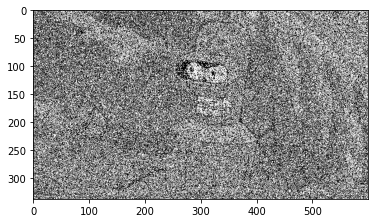

In [3]:
# read the image
bender_img = cv.imread('imgs/bender.png')
# convert the image to grayscale
bender_img_gray = cv.cvtColor(bender_img, cv.COLOR_BGR2GRAY)
#  the 'salt and pepper' noise 
h, w = bender_img_gray.shape
noise  = 2 * 255 *(np.random.rand(h, w) - 0.5) # to -255, 255
noise = np.where(np.abs(noise) < 128.0, 0, noise)
noise = np.where(noise <= -128.0, -255.0, noise)
noise = np.where(noise >= 128.0, 255.0, noise)
bender_img_noisy = np.clip(bender_img_gray + noise, 0, 255)
# save the noisy image
# cv.imwrite('imgs/bender_noisy.jpg', bender_img_noisy)
# plot the noisy image
plt.imshow(bender_img_noisy, cmap='gray')



Define some simple sort functions: (bubble-sort, insertion sort, selection-sort)

In [20]:
# bubble sort O(n^2)
def sort1_function(nums):
  # nums: list of numbers
  # return: sorted list of numbers
  for i in range(len(nums)):
    for j in range(len(nums) - 1):
      if nums[j] > nums[j + 1]:
        nums[j], nums[j + 1] = nums[j + 1], nums[j]
  return nums

In [26]:
# insertion sort O(n^2)
def sort2_function(nums):
    # nums: list of numbers
    # return: sorted list of numbers
    for i in range(1, len(nums)):
        key = nums[i]
        j = i - 1
        while j >= 0 and nums[j] > key:
            nums[j + 1] = nums[j]
            j -= 1
        nums[j + 1] = key

    return nums

In [30]:
# selection sort O(n^2)
def sort3_function(nums):
    # nums: list of numbers
    # return: sorted list of numbers
    for i in range(len(nums)):
        min_index = i
        for j in range(i + 1, len(nums)):
            if nums[j] < nums[min_index]:
                min_index = j
        nums[i], nums[min_index] = nums[min_index], nums[i]
    return nums

In [32]:
# default sort algorithm is quicksort in numpy.sort O(nlogn)
def get_median(a, b=None):
  h, w  = a.shape
  a_flat = a.flatten()
  a_sorted = np.sort(a_flat)
  return a_sorted[h * w // 2]

def get_median2(a, b=None):
  h, w  = a.shape
  a_flat = a.flatten()
  a_sorted = sort1_function(a_flat)
  return a_sorted[h * w // 2]

def get_median3(a, b=None):
  h, w  = a.shape
  a_flat = a.flatten()
  a_sorted = sort2_function(a_flat)
  return a_sorted[h * w // 2]

def get_median4(a, b=None):
  h, w  = a.shape
  a_flat = a.flatten()
  a_sorted = sort3_function(a_flat)
  return a_sorted[h * w // 2]

Elapsed using quicksort in seconds: 0.743899699999929
Elapsed using bubble sort in seconds: 41.02704560000075
Elapsed using insertion sort in seconds: 10.402816900000289
Elapsed using selection sort in seconds: 16.652576299999964


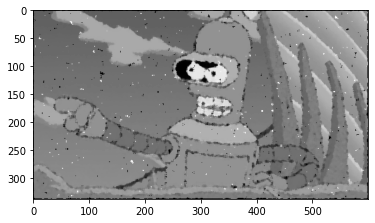

In [33]:
t1_start = perf_counter()
median_filter_img = generic_convolution(bender_img_noisy, np.ones((5, 5)), get_median)
t1_stop = perf_counter()
print("Elapsed using quicksort in seconds:", t1_stop-t1_start)

t1_start = perf_counter()
median_filter_img2 = generic_convolution(bender_img_noisy, np.ones((5, 5)), get_median2)
t1_stop = perf_counter()
print("Elapsed using bubble sort in seconds:", t1_stop-t1_start)

t1_start = perf_counter()
median_filter_img3 = generic_convolution(bender_img_noisy, np.ones((5, 5)), get_median3)
t1_stop = perf_counter()
print("Elapsed using insertion sort in seconds:", t1_stop-t1_start)

t1_start = perf_counter()
median_filter_img4 = generic_convolution(bender_img_noisy, np.ones((5, 5)), get_median4)
t1_stop = perf_counter()
print("Elapsed using selection sort in seconds:", t1_stop-t1_start)
# plot the results
plt.imshow(median_filter_img2, cmap='gray')

# Exercise 4
 * Advantage of the median filter (compared to mean filter):

    One advantage of the median filter is that it is robust to outliers. This is because the median is the middle value in a sorted list of values.
    Outliers are typicaly some extreme value, so we expect them to be either at the beggining or at the end of the list. Due to this, it is 
    better to replace each pixel value value of the pixel's neighboring values, rather than the mean, which is the average of all the values. 
    So the median will not be affected by outliers, and will be a better estimate of the true value of the pixel.
 * Disadvantage of the median filter (compared to mean filter):
 
    One disadvantage of the median filter is that it requires more computational resources than the mean filter. This is due to the fact that the median filter requires sorting the values in the neighborhood of each pixel, which is a computationally expensive operation. In contrast, the mean filter only requires the calculation of the arithmetic mean of the neighborhood pixels, which is a much less expensive operation. 

# Exercise 5
A low-pass filter can be applied only on the Fourier Transform of an image (frequency-domain image), rather than the original image (spacial-domain image).
What is the advantage of applying filtering in the Fourier Domain? 
The reason for doing the filtering in the frequency domain is because it is more efficient that doing it in the spatial domain. It is computationally faster to perform two 2D Fourier transforms and a filter multiply than to perform a convolution in the image (spatial) domain.


Create an Ideal Low Pass Filter
* has the effect of blurring (smoothing) an image as we will see in the results.

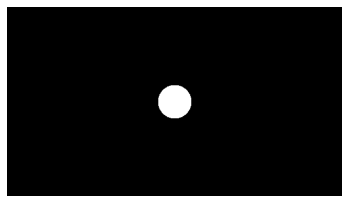

In [23]:
M, N = bender_img_gray.shape
# create a mask
mask_low_pass = np.zeros((M, N))
D0 = 30
for i in range(M):
    for j in range(N):
        if np.sqrt((i - M // 2)**2 + (j - N // 2)**2) < D0:
            mask_low_pass[i, j] = 1
# point of transition between 0 and 1 is called the cut-off frequency
plt.imshow(mask_low_pass, cmap='gray')
plt.axis('off')
plt.show()

Create an Ideal High Pass filter
* the opposite property (highpass filter) would enhace sharp detail, but cause a reduction of constrast in the image as we will see in the results.

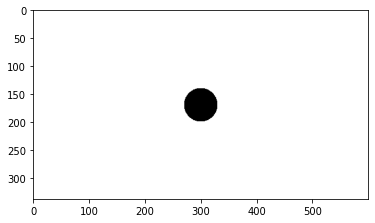

In [26]:
mask_high_pass = 1 - mask_low_pass
plt.imshow(mask_high_pass, cmap='gray')

Create a band-pass filter
* can be used to enhance certain features in an image: such as edges or textures, while suppressing others, such as noise

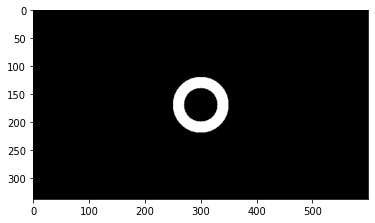

In [35]:
M,N = bender_img_gray.shape
mask_band_pass = np.zeros((M, N)) 
D0 = 30
D1 = 50
for i in range(M):
    for j in range(N):
        if np.sqrt((i - M // 2)**2 + (j - N // 2)**2) < D1 and np.sqrt((i - M // 2)**2 + (j - N // 2)**2) > D0:
            mask_band_pass[i, j] = 1
plt.imshow(mask_band_pass, cmap='gray')


C:\Users\Iustin\AppData\Local\Temp/ipykernel_27324/3985999309.py:13: RuntimeWarning: divide by zero encountered in log
  images = [img, np.log(np.abs(F)), np.log(np.abs(F_shift)), np.log(np.abs(G_shift)), g]


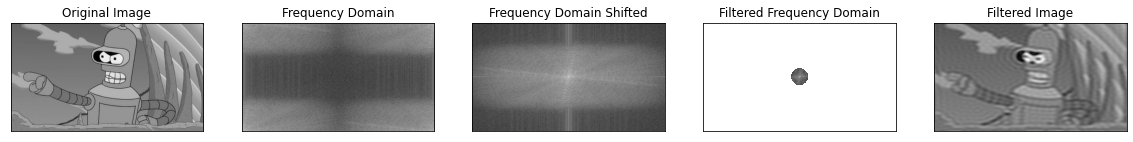

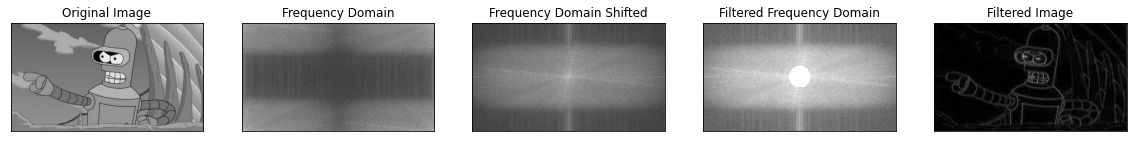

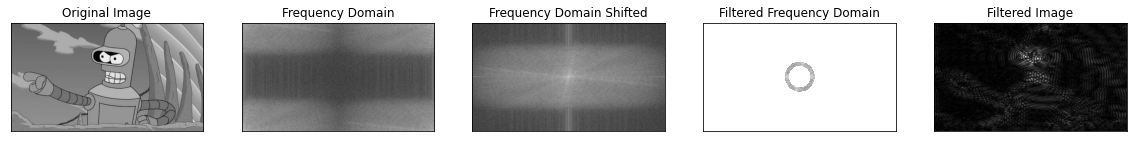

In [31]:
# using the Fast Fourier Transform (FFT), impelement the operation to apply a low-pass filter to an image 
# we will work with this image : bender_img_gray
def fast_fourier_transform(img, mask):
    F = np.fft.fft2(img)  # F(u,v) = image in the frequency domain
    # shift the frequency domain image in the center
    F_shift = np.fft.fftshift(F) # F(u,v) = image in the frequency domain

    G_shift = F_shift * mask 
    # plt.imshow(np.log(np.abs(G_shift)), cmap='gray')
    G = np.fft.ifftshift(G_shift) # G(u,v) = image in the frequency domain 
    g = np.abs(np.fft.ifft2(G)) # g(x,y) = image in the spatial domain

    images = [img, np.log(np.abs(F)), np.log(np.abs(F_shift)), np.log(np.abs(G_shift)), g] 
    titles = ['Original Image', 'Frequency Domain', 'Frequency Domain Shifted', 'Filtered Frequency Domain', 'Filtered Image'] 
    # set size of the figure
    plt.figure(figsize=(20, 20))
    for i in range(5):
        plt.subplot(1, 5, i+1), plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    
fast_fourier_transform(bender_img_gray, mask_low_pass)
fast_fourier_transform(bender_img_gray, mask_high_pass)
fast_fourier_transform(bender_img_gray, mask_band_pass)